# Repeated treatment
Code in this  Jupyter noteboo is used to illustrate the effects of an antibiotic concentration used in a 7 day treatment, with drug administered every 24 hours. 

For various scenarios (plankton, biofilm, or individual mechanisms), benefit and cost associated with the biofilm lifestyle needs to be defined. Results of these simulations are shown in Figure 7.

In [2]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import imp
import biofilm_functions as bio

## Main function


In [3]:
def repeated_treatment_experiment(name= 'repeated_treatment_', concentration_gradient = [0], init_pla=0, init_bio=1000000, biofilm_benefit=0, biofilm_cost=0):
    start = time.time()
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=4
    mutation_rate=0.0000010
    cost_vector=[0.1,0.1,0.1,0.1]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,2,2,2] 
    if len(cost_vector)>1 and len(cost_vector)<loci:
        print ('cost vector length does not match the number of loci')
    if len(benefit_vector)>1 and len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 2 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=-0.0006
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    
    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    plt.semilogy(my_treatment.bio_population_record, ':')
    plt.title('biofilm')
    plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    plt.show()
    
    #my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    #my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    
    
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

## Running the simulations for specific parameters

### Repeated experiment for C=2
Simulated for plankton, biofilm with EPS protection only, biofilm with physiological alterations only, and biofilm with the combination of both mechanisms

In [7]:
drug_c=2  #CHANGE THIS FOR DIFFERENT CONCEBTRATION
concentration_gradient=[drug_c,drug_c,drug_c,drug_c,drug_c,drug_c,drug_c]  #this defines 7 day treatment with the same concentration
R=1  #change for multiple repeats

running simulation no: 0
starting
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


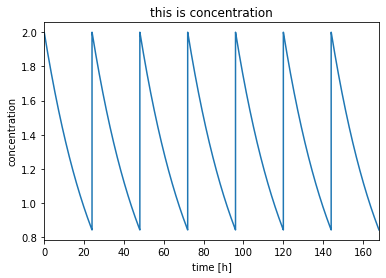

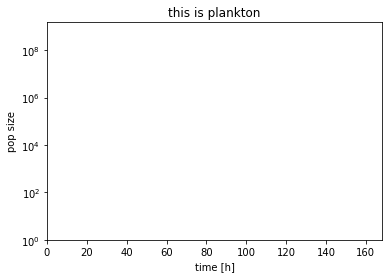

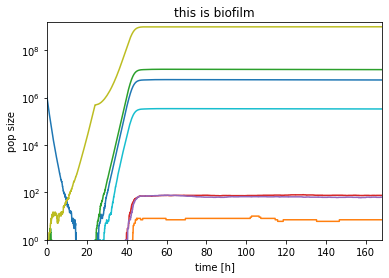

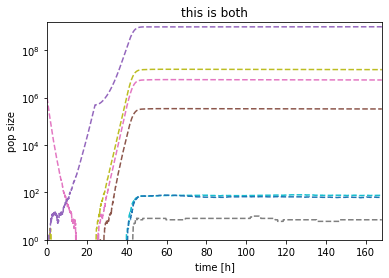

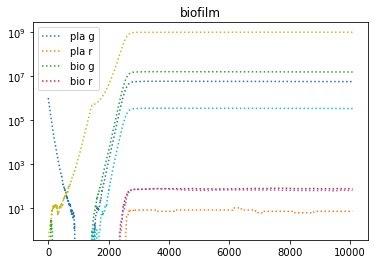

finished in  14.320072174072266
all saved as Repeated_t_C2_GenOnly0


In [8]:
biofilm_benefit=0 
biofilm_cost=0
name='Repeated_t_C'+str(drug_c)+'_GenOnly'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=repeated_treatment_experiment(name= name+str(i), concentration_gradient=concentration_gradient, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


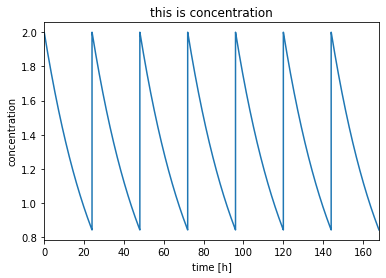

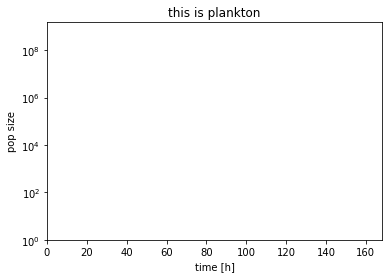

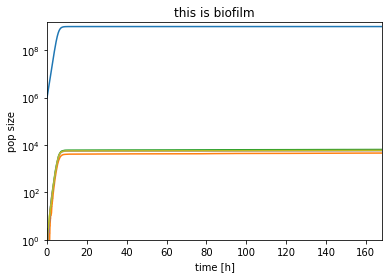

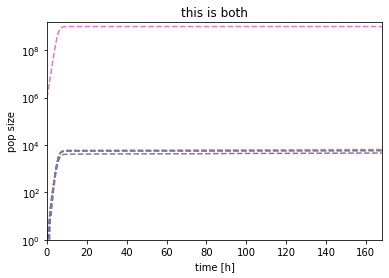

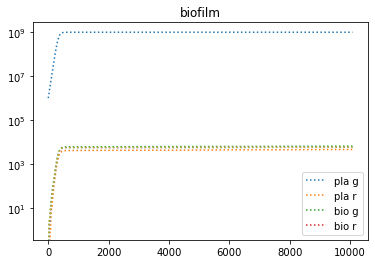

finished in  14.500348329544067
all saved as Repeated_t_C2_GenEPS0


In [9]:
biofilm_benefit=10 
biofilm_cost=0
name='Repeated_t_C'+str(drug_c)+'_GenEPS'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=repeated_treatment_experiment(name= name+str(i), concentration_gradient=concentration_gradient, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


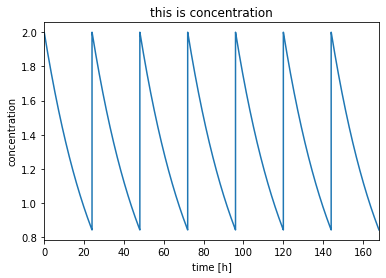

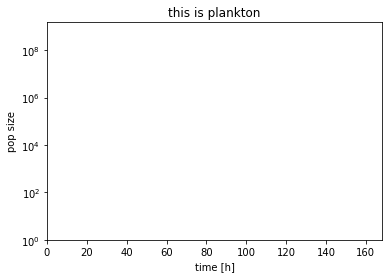

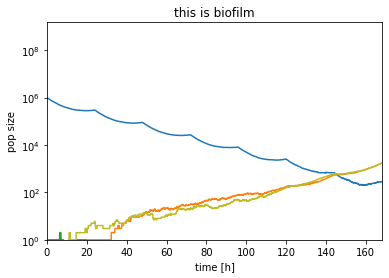

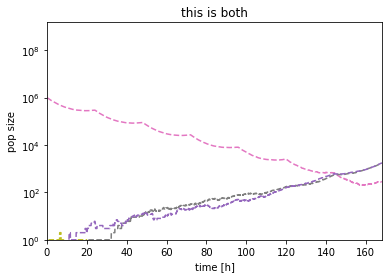

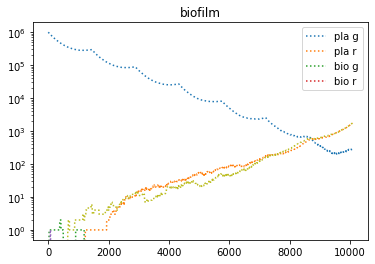

finished in  14.642980098724365
all saved as Repeated_t_C2_GenPhysio0


In [10]:
biofilm_benefit=0 
biofilm_cost=0.9
name='Repeated_t_C'+str(drug_c)+'_GenPhysio'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=repeated_treatment_experiment(name= name+str(i), concentration_gradient=concentration_gradient, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


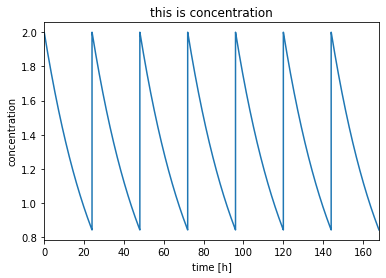

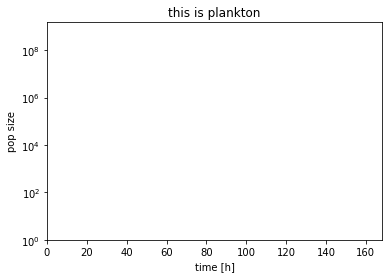

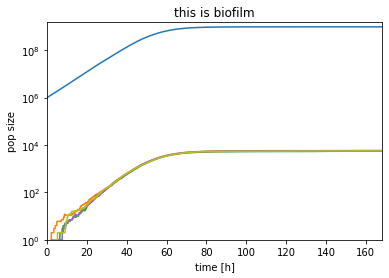

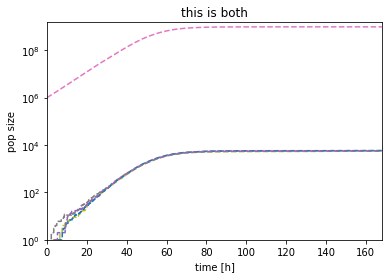

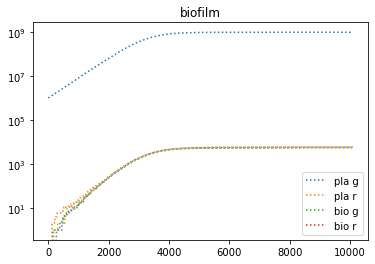

finished in  14.368598937988281
all saved as Repeated_t_C2_GenEPSPhysio0


In [12]:
biofilm_benefit=10 
biofilm_cost=0.9
name='Repeated_t_C'+str(drug_c)+'_GenEPSPhysio'
for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=repeated_treatment_experiment(name= name+str(i), concentration_gradient=concentration_gradient, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

## Getting extinction times

In [ ]:
def get_mutant_timing(name='', pop_name='_bio_pop', N=1, k=1):
    #fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    #ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    mut_timing=[]
    extinction_timing=[]
    last_extinction_timing=[]
   
    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        pop=np.loadtxt(loadname+pop_name+'.txt')
        
        #plt.semilogy(this_time, pop)
        [tp,strains]=(np.shape(pop))

        this_mut_timing=np.zeros([strains])
        this_extinction_timing=np.zeros([strains])
        for j in range(strains):
            non_zero=(np.nonzero(pop[:,j]))
            non_zero=non_zero[0]
            times=this_time[non_zero]
            #print ('in j', j, 'min', min(non_zero, default=T), 'max', max(non_zero, default=0))
            this_mut_timing[j]=min(times, default=np.nan)
            this_extinction_timing[j]=max(times, default=np.nan)
        mut_timing.append(this_mut_timing)
        extinction_timing.append(this_extinction_timing)
        
        max_extinction=np.nanmax(this_extinction_timing)
        last_extinction_timing.append(max_extinction)
        #print ('in sims i=',i,'laxt went extinct at ', max_extinction)
        
    mut_timing=np.array(mut_timing)
    extinction_timing=np.array(extinction_timing)
    
    strain_appearence=(np.count_nonzero(~np.isnan(mut_timing),0))
    strain_extinction=(np.count_nonzero(~np.isnan(extinction_timing),0))
    return (last_extinction_timing)
 
    

## Getting population composition

In [ ]:
def get_one_population_composition(pop, genotypes, weights):
    this_composition=np.zeros([k+1])
    for i in range (k+1):
        this_composition[i]= (np.sum(pop[weights==i]))
    return this_composition

def get_mean_final_pop(name='',addname='_bio_pop.txt', N=1, k=1):
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    #ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    genotypes=generate_genotypes(k)
    weights=np.sum(genotypes,1)
    final_composition=np.zeros([k+1])

    
    for i in range (N):
        loadname=name+str(i)
        pop=np.loadtxt(loadname+addname)
        final_pop=pop[-1, :]
        this_final_composition=get_one_population_composition(final_pop, genotypes, weights)
        #print ('this is final local', this_final_composition)
        final_composition=final_composition+this_final_composition
        #print ('final', final_composition)
    final_composition=final_composition/N
    x = ([0,1,2,3,4])
    plt.bar(x, final_composition, align='center', log=True, alpha=0.5)
    return (final_composition)

## Plotting the results: 

In [13]:
def plot_all_dynamics(name='', N=1):
    savename0=name+'F'
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        this_conc=np.loadtxt(loadname+'_conc.txt')
        dynamics_pla=np.loadtxt(loadname+'_pla_pop.txt')
        plt.semilogy(this_time, dynamics_pla, alpha=0.1)
        #plt.semilogy(dynamics_pla, alpha=0.1)
    plt.xlabel('Time [h]')
    plt.ylabel('N')
    plt.ylim(1,5*10**9)
    plt.xlim(0,9*24)
    plt.savefig('00'+name+'FigPlaDyn.png', dpi=200,bbox_inches='tight')
    fig1.show()

    fig2, ax2 = plt.subplots(dpi=200, figsize=(3, 2))
    ax2.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        #this_conc=np.loadtxt(loadname+'_conc.txt')
        dynamics_bio=np.loadtxt(loadname+'_bio_pop.txt')
        plt.semilogy(this_time, dynamics_bio, ':', alpha=0.3)
        #plt.semilogy( dynamics_bio, alpha=0.3)
    #plt.title('Biofilm')
    plt.xlabel('Time [h]')
    plt.ylabel('N')
    plt.ylim(1,5*10**9)
    #plt.xlim(0,7)
    plt.xlim(0,9*24)
    plt.savefig('00'+name+'FigBioDyn.png', dpi=200,bbox_inches='tight')
    fig1.show()

    print ('all done')
    
def generate_genotypes(k):  # this function generates 2^k phenotypes
    All = np.empty([0, k])
    for seq in itertools.product("01", repeat=k):
        s = np.array(seq)
        s = list(map(int, s))
        All = np.vstack([All, s])
    return All


def get_mean_mut_num(name='', N=1, color='b', k=1):
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    gens=generate_genotypes(k)
    sum_mut=np.sum(gens,1)
    mut_weights=sum_mut
    for i in range (8):
            plt.axvline(x=12+i*24, color='green', linestyle='-', linewidth=21.5, alpha=0.1*i)

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        
        pop=np.loadtxt(loadname+'_pla_pop.txt')
        weighted_pops=pop*mut_weights
        mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
        a=np.sum(weighted_pops,1)
        b=np.sum(pop,1)
        mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
        if mean_mut.any()<0:
            print ('negative', a,b)
        plt.plot(this_time, mean_mut,'red', linewidth=2, alpha=0.05)
        plt.xlim(0,8*24)
        plt.ylim(0,4.5)
        #print (mean_mut)
    plt.savefig(name+'MutNumPla.png', dpi=200,bbox_inches='tight')
    plt.show()
    
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])
    for i in range (8):
            plt.axvline(x=12+i*24, color='green', linestyle='-', linewidth=21.5, alpha=0.1*i)

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        
        pop=np.loadtxt(loadname+'_bio_pop.txt')
        weighted_pops=pop*mut_weights
        mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
        a=np.sum(weighted_pops,1)
        b=np.sum(pop,1)
        mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
        if mean_mut.any()<0:
            print ('negative', a,b)
        plt.plot(this_time, mean_mut,'blue', linewidth=2, alpha=0.05)
        plt.xlim(0,8*24)
        #plt.ylim(0,4.5)
        #print (mean_mut)
   
    

    plt.xlabel('time [h]', fontsize=12)
    plt.ylabel('number of mutations', fontsize=12)
    plt.savefig(name+'MutNumBio.png', dpi=200,bbox_inches='tight')
    plt.show()
    
    print ('done')
    return (mean_mut, pop)

In [14]:
R=1
drug_c=2
nameA='Repeated_t_C'+str(drug_c)+'_GenOnly'
nameB='Repeated_t_C'+str(drug_c)+'_GenEPS'
nameC='Repeated_t_C'+str(drug_c)+'_GenPhysio'
nameD='Repeated_t_C'+str(drug_c)+'_GenEPSPhysio'



In [ ]:
plot_all_dynamics(name=nameA, N=R)
get_mean_mut_num(name=nameA, N=R, color='b', k=4)
extinction_timeA=get_mutant_timing(name=nameA, N=R, k=4)

plot_all_dynamics(name=nameB, N=R)
get_mean_mut_num(name=nameB, N=R, color='b', k=4)
extinction_timeB=get_mutant_timing(name=nameB, N=R, k=4)

plot_all_dynamics(name=nameC, N=R)
get_mean_mut_num(name=nameC, N=R, color='b', k=4)
extinction_timeC=get_mutant_timing(name=nameC, N=R, k=4)

plot_all_dynamics(name=nameD, N=R)
get_mean_mut_num(name=nameD, N=R, color='b', k=4)
extinction_timeD=get_mutant_timing(name=nameD, N=R, k=4)
